Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [108]:
import pandas as pd

%store -r citybikes_data
%store -r foursquare_data
%store -r yelp_data 

concatenated_data = pd.concat([citybikes_data, foursquare_data, yelp_data], axis=1)

concatenated_data.rename(columns={'Distance (meters)': 'distance_meters'}, inplace=True)

%store concatenated_data

Stored 'concatenated_data' (DataFrame)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

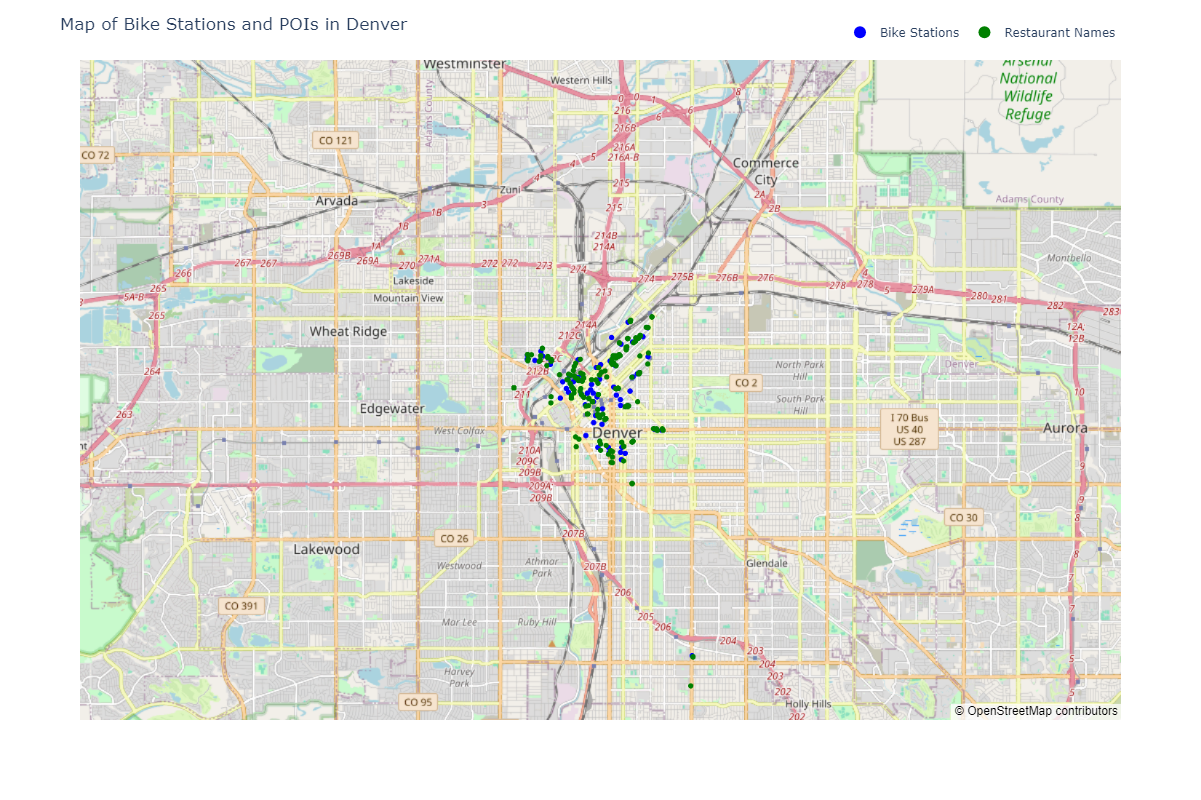

In [65]:
import plotly.express as px
import pandas as pd
from geopy.distance import geodesic

bike_stations = [
    {"Station Name": "Walnut St at 26th St", "latitude": 39.759344, "longitude": -104.986164},
    {"Station Name": "Welton St at 15th St", "latitude": 39.74373, "longitude": -104.99226},
    {"Station Name": "12th St at Auraria Pkwy", "latitude": 39.748321, "longitude": -105.0043619},
    {"Station Name": "18th St at Wazee St", "latitude": 39.75296271, "longitude": -104.9974017},
    {"Station Name": "Tremont Pl at Park Ave W", "latitude": 39.7501737, "longitude": -104.9804304},
    {"Station Name": "18th St at Arapahoe St", "latitude": 39.7496545, "longitude": -104.9930748},
    {"Station Name": "35th St at Larimer St", "latitude": 39.7668946, "longitude": -104.9743533},
    {"Station Name": "E 12th Ave at Grant St", "latitude": 39.7353179, "longitude": -104.9832527},
    {"Station Name": "19th St at Wynkoop St", "latitude": 39.75459034, "longitude": -104.9971026},
    {"Station Name": "16th St at Platte St", "latitude": 39.7572151, "longitude": -105.0077941},
    {"Station Name": "31st St at California St", "latitude": 39.7592646, "longitude": -104.9742307},
    {"Station Name": "W 12 Ave at Broadway", "latitude": 39.7353177, "longitude": -104.9878646},
    {"Station Name": "Erie St at Tejon St", "latitude": 39.760678, "longitude": -105.0110208},
    {"Station Name": "Brighton Blvd at 29th St", "latitude": 39.7643291, "longitude": -104.9867745},
    {"Station Name": "Central St at Kensing Ct", "latitude": 39.7589105, "longitude": -105.0086523},
    {"Station Name": "25th St at Lawrence St", "latitude": 39.7569027, "longitude": -104.9854662},
    {"Station Name": "W 29th Ave at Zuni St", "latitude": 39.758575, "longitude": -105.015749},
    {"Station Name": "21st St at Lawrence St", "latitude": 39.753335, "longitude": -104.990856},
    {"Station Name": "18th St at Champa St", "latitude": 39.74864489, "longitude": -104.991756},
    {"Station Name": "Wazee Street & 15th Street", "latitude": 39.7499163, "longitude": -105.0016052},
    {"Station Name": "Broadway at Walnut St", "latitude": 39.7581242, "longitude": -104.9872752},
    {"Station Name": "21st St at Tremont Pl", "latitude": 39.7479403, "longitude": -104.9837465},
    {"Station Name": "Humboldt St at E Colfax Ave", "latitude": 39.7398565, "longitude": -104.9696043},
    {"Station Name": "Larimer St at 16th St", "latitude": 39.7494994, "longitude": -104.9971826},
    {"Station Name": "Wewatta St at 17th St", "latitude": 39.754198, "longitude": -105.001257},
    {"Station Name": "Blake St at Park Ave W", "latitude": 39.757175, "longitude": -104.990517},
    {"Station Name": "25th St at Larimer St", "latitude": 39.757547, "longitude": -104.986402},
    {"Station Name": "Grant St at E 11th Ave", "latitude": 39.733998, "longitude": -104.9836776},
    {"Station Name": "Court Pl at 15th St", "latitude": 39.7414257, "longitude": -104.9900552},
    {"Station Name": "Brighton Blvd at 33rd St", "latitude": 39.7683802, "longitude": -104.98115},
    {"Station Name": "27th St at Welton St", "latitude": 39.754741, "longitude": -104.97793},
    {"Station Name": "Lawrence St at 18th St", "latitude": 39.7504992, "longitude": -104.9939508},
    {"Station Name": "W 29th Ave at Inca St", "latitude": 39.7584767, "longitude": -104.9982378},
    {"Station Name": "Blake St at 29th St", "latitude": 39.762586, "longitude": -104.9835284},
    {"Station Name": "E 10th Ave at Grant St", "latitude": 39.7320882, "longitude": -104.9833903},
    {"Station Name": "W 14th Ave at Fox St", "latitude": 39.7384434, "longitude": -104.9956133},
    {"Station Name": "Wynkoop St at 15th St", "latitude": 39.7508683, "longitude": -105.0023092},
    {"Station Name": "18th St at Wynkoop St", "latitude": 39.7537028, "longitude": -104.9983586},
    {"Station Name": "Delgany St at 15th St", "latitude": 39.7526474, "longitude": -105.0035237},
    {"Station Name": "21st St at Welton St", "latitude": 39.7491124, "longitude": -104.98513},
    {"Station Name": "19th St at Larimer St", "latitude": 39.75194111, "longitude": -104.9936239},
    {"Station Name": "Champa St at 17th St", "latitude": 39.747395, "longitude": -104.992955},
    {"Station Name": "11th at Broadway", "latitude": 39.7339564, "longitude": -104.987657},
    {"Station Name": "Wynkoop St at 16th St", "latitude": 39.7520686, "longitude": -105.0007928},
    {"Station Name": "26th St at Welton St", "latitude": 39.7539262, "longitude": -104.9794034},
    {"Station Name": "Pennsylvania St at E 19th St", "latitude": 39.746396, "longitude": -104.981148},
    {"Station Name": "Larimer St at 27th St", "latitude": 39.759395, "longitude": -104.984393},
    {"Station Name": "Glenarm Pl at 14th St", "latitude": 39.7418668, "longitude": -104.9929222},
    {"Station Name": "Stout St at 22nd St", "latitude": 39.7512447, "longitude": -104.9860453},
    {"Station Name": "29th St at Larimer St", "latitude": 39.7613886, "longitude": -104.9817286},
    {"Station Name": "Blake St at 22nd", "latitude": 39.75642, "longitude": -104.99201},
    {"Station Name": "Vallejo St at W 29th Ave", "latitude": 39.7582758, "longitude": -105.0131165},
    {"Station Name": "Lawrence St at 33rd St", "latitude": 39.7645408, "longitude": -104.9759737},
    {"Station Name": "W 12th Ave at Cherokee St", "latitude": 39.7353033, "longitude": -104.9914745},
    {"Station Name": "15th St at Curtis St", "latitude": 39.7465564, "longitude": -104.9958241},
    {"Station Name": "Boulder Street & 16th Street", "latitude": 39.7594322, "longitude": -105.0104252},
    {"Station Name": "W 30th Ave at Zuni St", "latitude": 39.7596819, "longitude": -105.0156723},
    {"Station Name": "Welton St at 17th St", "latitude": 39.7455193, "longitude": -104.9899082},
    {"Station Name": "N Marion St at Colfax Ave", "latitude": 39.7401668, "longitude": -104.972203},
    {"Station Name": "E 11th Ave at Logan St", "latitude": 39.7337557, "longitude": -104.9821118},
    {"Station Name": "Grant St at E 19th Ave", "latitude": 39.74641, "longitude": -104.98367},
    {"Station Name": "Wynkoop St at 17th St", "latitude": 39.752701, "longitude": -104.999787},
    {"Station Name": "Lawrence St at 17th St", "latitude": 39.7496126, "longitude": -104.995105},
    {"Station Name": "32nd St at Larimer St", "latitude": 39.7641559, "longitude": -104.9779038},
    {"Station Name": "Larimer St at 31st St", "latitude": 39.7631337, "longitude": -104.9795555},
    {"Station Name": "E Asbury Ave at S University Blvd", "latitude": 39.680309, "longitude": -104.9591093}
]

bike_stations_df = pd.DataFrame(bike_stations)

%store -r foursquare_data
%store -r yelp_data

poi_data = pd.concat([foursquare_data, yelp_data])

fig = px.scatter_mapbox(bike_stations_df, lat='latitude', lon='longitude',
                        hover_name='Station Name', zoom=11)

fig.add_scattermapbox(lat=bike_stations_df['latitude'], lon=bike_stations_df['longitude'],
                      mode='markers', marker=dict(size=6, color='blue'), hovertext=poi_data['Station Name'],
                      name='Bike Stations')

fig.add_scattermapbox(lat=poi_data['Latitude'], lon=poi_data['Longitude'],
                      mode='markers', marker=dict(size=6, color='green'),
                      hovertext=poi_data['Business Name'], name='Restaurant Names')

fig.update_layout(mapbox_style="open-street-map", height=800, width=1200)  # Adjust height and width as needed
fig.update_layout(title='Map of Bike Stations and POIs in Denver')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    itemsizing = 'constant'
))
fig.show()

In [67]:
from geopy.distance import geodesic
import pandas as pd

distances_df = pd.DataFrame(columns=['Bike Station 1', 'Bike Station 2', 'Distance'])

for index_bike1, row_bike1 in citybikes_data.iterrows():
    for index_bike2, row_bike2 in citybikes_data.iterrows():
        if index_bike1 != index_bike2:  
            
            coords_bike1 = (row_bike1['latitude'], row_bike1['longitude'])
            coords_bike2 = (row_bike2['latitude'], row_bike2['longitude'])
            distance = geodesic(coords_bike1, coords_bike2).meters
            
            
            distances_df = pd.concat([distances_df, pd.DataFrame({
                'Bike Station 1': [row_bike1['Station Name']],
                'Bike Station 2': [row_bike2['Station Name']],
                'Distance': [distance]
            })], ignore_index=True)


distances_df['Distance'] = pd.to_numeric(distances_df['Distance'])

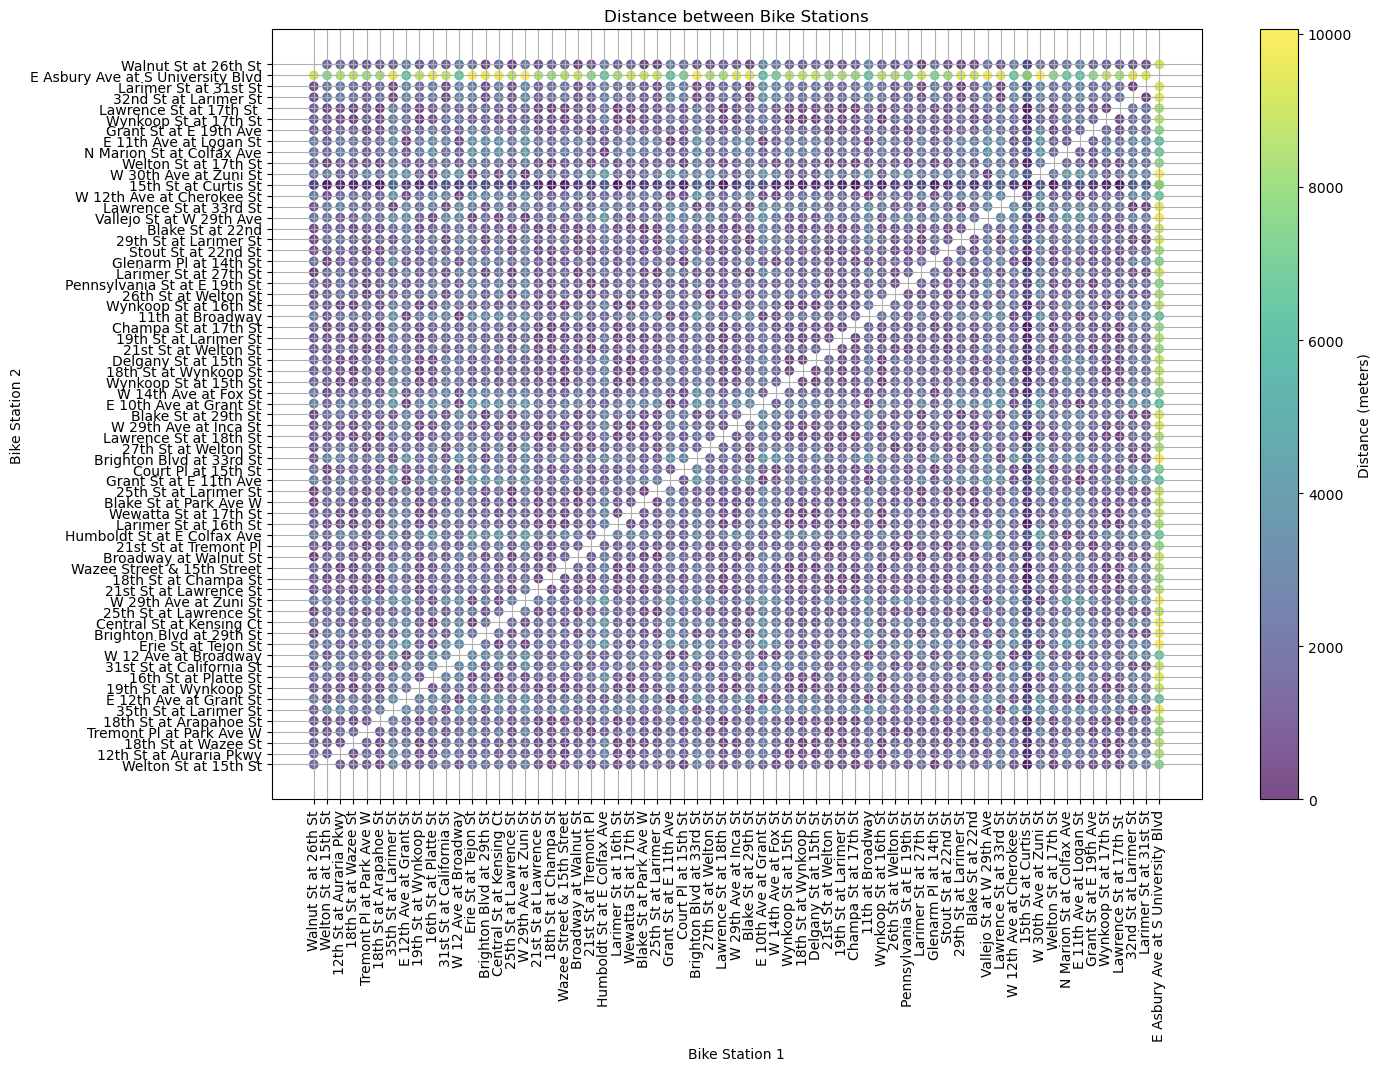

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(distances_df['Bike Station 1'], distances_df['Bike Station 2'], c=distances_df['Distance'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Distance (meters)')
plt.xlabel('Bike Station 1')
plt.xticks(rotation='vertical')
plt.ylabel('Bike Station 2')
plt.title('Distance between Bike Stations')
plt.grid(True)
plt.show()


Explain the initial pattern or relationship you discoved through this visualization. 

My initial process when trying to understand the data that was pulled using the two different APIs, it was hard to find relevant information I can use to do some analysis. In order to merge the two DataFrames I had to examine all the similar information that I could get from those two APIs. Here are the information types that were seen in both API requests: unique id, name, categories, is_closed, link, coordinates, location, distance. Out of these I had listed, only a few were relevant enough to use in an EDA process for analyzation and here I had chosen the name, coordinates and distance. And when using a geospatial mapping visualization, my initial finding shows that most of the bike stations were between 0 - 4000 meters from each other except for one bike station which was located in the University District part of Denver which was over 10000 meters away from the nearest bike station. 



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [106]:
citybikes_data.columns = ['station_name_citybikes', 'latitude_citybikes', 'longitude_citybikes', 'available_bikes_citybikes']

foursquare_data.columns = ['station_name_foursquare', 'business_name_foursquare', 'distance_meters_foursquare', 'latitude_foursquare', 'longitude_foursquare']

yelp_data.columns = ['station_name_yelp', 'business_name_yelp', 'distance_meters_yelp', 'latitude_yelp', 'longitude_yelp']

concatenated_data = pd.concat([citybikes_data, foursquare_data, yelp_data], axis=1)

db_path = r"C:\Users\angel\Statistical-Modelling-Project\data\combined_data.db"

conn = sqlite3.connect(db_path)

concatenated_data.to_sql('CombinedData', conn, index=False, if_exists='replace')

conn.commit()
conn.close()


Look at the data before and after the join to validate your data.

In [107]:
import sqlite3
import pandas as pd

db_path = r"C:\Users\angel\Statistical-Modelling-Project\data\combined_data.db"

conn = sqlite3.connect(db_path)

query = "SELECT * FROM CombinedData"

data_from_db = pd.read_sql_query(query, conn)

conn.close()

data_from_db.head()


,station_name_citybikes,latitude_citybikes,longitude_citybikes,available_bikes_citybikes,station_name_foursquare,business_name_foursquare,distance_meters_foursquare,latitude_foursquare,longitude_foursquare,station_name_yelp,business_name_yelp,distance_meters_yelp,latitude_yelp,longitude_yelp
0,Walnut St at 26th St,39.759344,-104.986164,0.0,WALNUT ST AT 26TH ST,Osaka Ramen,22.0,39.759544,-104.986206,Walnut St at 26th St,The Denver Central Market,138,39.759364,-104.984548
1,Welton St at 15th St,39.743730,-104.992260,4.0,WALNUT ST AT 26TH ST,Honey Elixir Bar,76.0,39.759479,-104.985294,Walnut St at 26th St,First Draft Taproom & Kitchen,85,39.758999,-104.985273
2,12th St at Auraria Pkwy,39.748321,-105.004362,1.0,WELTON ST AT 15TH ST,Henry's Tavern,71.0,39.743988,-104.991588,Welton St at 15th St,Stout Street Social,231,39.744130,-104.995010
3,18th St at Wazee St,39.752963,-104.997402,0.0,WELTON ST AT 15TH ST,Coyote Ugly Saloon,102.0,39.743804,-104.990843,Welton St at 15th St,Lazo Empanadas - 16Th Mall,316,39.742909,-104.988747
4,Tremont Pl at Park Ave W,39.750174,-104.980430,2.0,12TH ST AT AURARIA PKWY,Breckenridge Brewery Mountain House Restaurant,218.0,39.748691,-105.007531,12th St at Auraria Pkwy,Rhein Haus - Denver,323,39.748355,-105.000585


There were no change in the data from before and after. This is due to my decision to concatenate the data istead of merging the data since the POIs (restaurants, bar, coffee, etc) that was pulled from the two APIs yielded different results. So by merging them together there would be a lot of NaN values which would significanly alter our analysis. Dropping these NaN values were also not in the best interest as we will be losing a lot of data. Therefore, the best way in combining the two dataframes were to do a concatination between the two parts. 